In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('goldprice.csv')
df.head()

In [ ]:
df.info()

In [4]:
df.shape

(2290, 6)

In [ ]:
df.isnull().sum()

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = df.corr()

<Axes: >

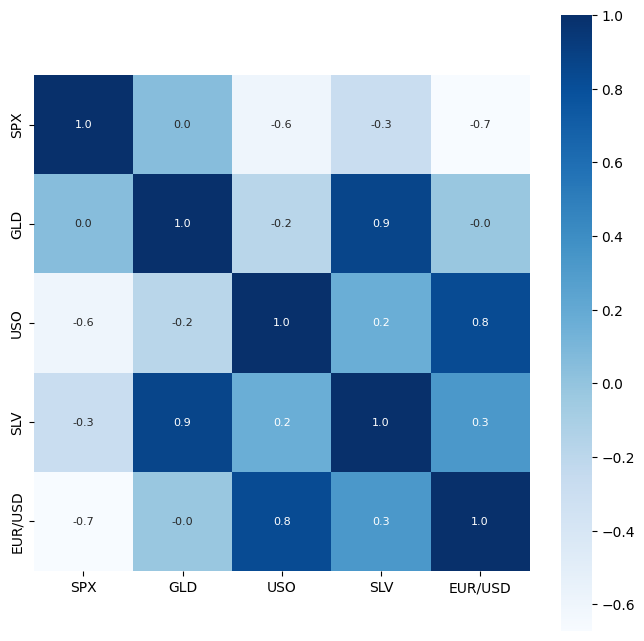

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,annot=True,fmt='.1f',square=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
x = df.drop(['Date','GLD'],axis = 1)
x

In [11]:
y = df['GLD']
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [13]:
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
x_pred = model.predict(x_train)

# R Squred Error
metrics.r2_score(y_train,x_pred)

0.9983624369708447

In [15]:
#For Test Data R Squred error
model.fit(x_test,y_test)
x_pred_test = model.predict(x_test)
metrics.r2_score(y_test,x_pred_test)

0.9964748957533174

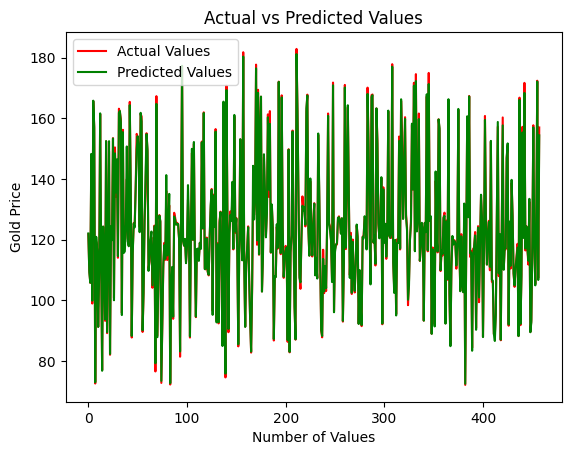

In [16]:
Y_test = list(y_test)
plt.plot(Y_test,color = 'red',label = 'Actual Values')
plt.plot(x_pred_test,color = 'green',label = 'Predicted Values')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()